# Final Project Part 3: Credit Default Prediction

### The target variable you want to predict

The target variable that I want to predict is if the customer will default next month.

### 1. How predicting that target variable could help with some kind of decision

Predicting this variable will help the bank determine whether or not to provide a credit line increase or potentially a credit line decrease to customers to either maximize revenue or minimize loss. My assumption is if the customer is paying consistently every month, the probability of defaulting in the next payment is very unlikely. 

### 2. The features you want to use to predict that target variable

o	The features used to predict this variable from the data are: 
- Amount of given credit 
- Gender
- Education
- Marital Status
- Age 
- History of Repayment Status from April – September 2015 (each month is a separate column)
- Amount of bill statement from April – September 2015 (each month is a separate column)
- Amount of previous payment from April – September 2015 (each month is a separate column)

### 3. Goals and success metrics

The goal is to be able to predict if the customer is going to default the next month (October 2015). 

### 4. Risks or limitations

The main limitation is there is only data from April – September 2015 and may not be sufficient enough to predict if the customer is going to default. Using only 6 months of data to predict if a customer is going to default is limited because the entire life cycle of the card could provide better insights. 

$\blacksquare$

## Understanding/Prepping the Data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import pandas as pd
credit_card_default = pd.read_csv('./data/credit_card_default.csv')
credit_card_default.head()
credit_card_default = credit_card_default.set_index('ID')
credit_card_default.head()
#Imported data and set ID as index 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
credit_card_default.shape
#22,500 rows and 24 columns

(22500, 24)

In [4]:
credit_card_default.isnull().sum()
#no missing data

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
credit_card_default.loc[:,'EDUCATION'] = credit_card_default.loc[:, 'EDUCATION'].replace({5: 4, 6: 4, 0: 4})
credit_card_default.loc[:,'EDUCATION'].value_counts().sort_values()
#Education has numbers '0,5,6' and changed it to 4 because appropriate values are:
# 1 = graduate school, 2 = university, 3 = high school, 4 = others

4      303
3     3581
1     7982
2    10634
Name: EDUCATION, dtype: int64

In [6]:
credit_card_default.loc[:,'MARRIAGE'] = credit_card_default.loc[:, 'MARRIAGE'].replace({0: 3})
credit_card_default.loc[:,'MARRIAGE'].value_counts()
#Marriage had 0 so changing it to 3 for 'others because appropriate values are:
# 1 = married, 2 = single, 3 = others

2    12219
1     9990
3      291
Name: MARRIAGE, dtype: int64

In [7]:
credit_card_default.loc[credit_card_default.loc[:,'AGE'] <= 0,:]
#Making sure there are no ages < 0

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,


In [8]:
credit_card_default.loc[:,'default payment next month'].value_counts(normalize=True)
#Identify percentage of defaults

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [9]:
credit_card_default.dtypes
#All variables are integers or floats

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

$\blacksquare$ 

## Exploratory Data Analysis

### 1. Feature Engineering

In [10]:
credit_card_default['Credit_Util_Rate_1'] = (credit_card_default['BILL_AMT1'] - credit_card_default['PAY_AMT1'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_2'] = (credit_card_default['BILL_AMT2'] - credit_card_default['PAY_AMT2'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_3'] = (credit_card_default['BILL_AMT3'] - credit_card_default['PAY_AMT3'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_4'] = (credit_card_default['BILL_AMT4'] - credit_card_default['PAY_AMT4'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_5'] = (credit_card_default['BILL_AMT5'] - credit_card_default['PAY_AMT5'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_6'] = (credit_card_default['BILL_AMT6'] - credit_card_default['PAY_AMT6'])/credit_card_default['LIMIT_BAL']

credit_card_default['Credit_Util_Avg'] = (credit_card_default['Credit_Util_Rate_1'] +
                                        credit_card_default['Credit_Util_Rate_2'] +
                                        credit_card_default['Credit_Util_Rate_3'] +
                                        credit_card_default['Credit_Util_Rate_4'] +
                                        credit_card_default['Credit_Util_Rate_5'] +
                                        credit_card_default['Credit_Util_Rate_6'])/6

#Build 'Credit Utilization Rate' calculation as feature engineering
    #Credit Utilization Rate = Total Debt/Total Available Credit
    #More information: https://www.experian.com/blogs/ask-experian/credit-education/score-basics/credit-utilization-rate/
#Create new variable call 'Credit_Util_Rate' for every month and find the AVERAGE rate

In [11]:
credit_card_default.columns
#Check the columns 

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Credit_Util_Rate_1',
       'Credit_Util_Rate_2', 'Credit_Util_Rate_3', 'Credit_Util_Rate_4',
       'Credit_Util_Rate_5', 'Credit_Util_Rate_6', 'Credit_Util_Avg'],
      dtype='object')

### 2. Data Visualizations and Insights

In [12]:
credit_card_default.describe()
#Describe does not apply to 'ID', SEX', 'EDUCATION', and 'MARRIAGE'

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,163424.608000,1.610178,1.831333,1.568933,35.212889,0.015067,-0.106978,-0.137422,-0.197333,-0.237067,...,4694.131200,5088.028222,0.226133,0.383564,0.371962,0.358169,0.323337,0.302965,0.287063,0.337843
std,128515.245979,0.487721,0.734407,0.520698,9.307266,1.119824,1.197125,1.202637,1.164344,1.137459,...,15023.608194,17300.349898,0.418336,0.415597,0.412199,0.395713,0.373015,0.355392,0.354784,0.341167
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,-2.664750,-3.404694,-2.882782,-3.086000,-2.530600,-3.013530,-0.746872
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,247.000000,56.000000,0.000000,0.005234,0.002642,0.002531,0.001632,0.000000,0.000000,0.005748
50%,135000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1463.000000,0.000000,0.285607,0.271033,0.252927,0.219094,0.190837,0.163778,0.245906
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4000.000000,4000.000000,0.000000,0.772794,0.751924,0.707582,0.620643,0.572435,0.553923,0.637818
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,417990.000000,528666.000000,1.000000,6.234300,6.198000,5.235400,4.986850,4.928000,3.785550,5.203558


#### Correlation Analysis

In [13]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg
LIMIT_BAL,1.000000,0.016259,-0.247428,-0.108019,0.145016,-0.263680,-0.295251,-0.284323,-0.260785,-0.242676,...,0.220117,0.225258,-0.148079,-0.334008,-0.343777,-0.340462,-0.323860,-0.316518,-0.299338,-0.368703
SEX,0.016259,1.000000,0.009012,-0.016432,-0.132641,-0.050606,-0.061151,-0.059282,-0.051407,-0.047535,...,-0.001442,-0.009680,-0.038250,-0.065321,-0.064713,-0.058270,-0.047808,-0.041110,-0.031314,-0.058834
EDUCATION,-0.247428,0.009012,1.000000,-0.132721,0.172016,0.118907,0.140543,0.128700,0.122726,0.109836,...,-0.045185,-0.047276,0.036193,0.178317,0.171201,0.164000,0.148268,0.134107,0.128593,0.174970
MARRIAGE,-0.108019,-0.016432,-0.132721,1.000000,-0.413992,0.012663,0.018712,0.026555,0.024197,0.029844,...,0.001265,-0.003623,-0.033205,0.032354,0.031268,0.031675,0.032453,0.031380,0.031581,0.035824
AGE,0.145016,-0.132641,0.172016,-0.413992,1.000000,-0.034701,-0.048135,-0.050460,-0.045635,-0.048023,...,0.024777,0.017653,0.009450,-0.019427,-0.022323,-0.032010,-0.042561,-0.042324,-0.039321,-0.036546
PAY_0,-0.263680,-0.050606,0.118907,0.012663,-0.034701,1.000000,0.664267,0.562983,0.525229,0.492612,...,-0.058065,-0.063793,0.324702,0.377020,0.376509,0.373832,0.372570,0.370763,0.361819,0.419601
PAY_2,-0.295251,-0.061151,0.140543,0.018712,-0.048135,0.664267,1.000000,0.762511,0.659204,0.616761,...,-0.039970,-0.038711,0.260688,0.467960,0.455378,0.447395,0.447093,0.441090,0.428726,0.505553
PAY_3,-0.284323,-0.059282,0.128700,0.026555,-0.050460,0.562983,0.762511,1.000000,0.776793,0.684168,...,-0.037703,-0.041346,0.233688,0.381507,0.459452,0.444999,0.445710,0.437993,0.429060,0.487626
PAY_4,-0.260785,-0.051407,0.122726,0.024197,-0.045635,0.525229,0.659204,0.776793,1.000000,0.822062,...,-0.034260,-0.027655,0.213800,0.367514,0.396422,0.472331,0.467346,0.460061,0.451444,0.489030
PAY_5,-0.242676,-0.047535,0.109836,0.029844,-0.048023,0.492612,0.616761,0.684168,0.822062,1.000000,...,-0.035307,-0.026352,0.207287,0.354455,0.380879,0.422448,0.497747,0.484456,0.469580,0.486524


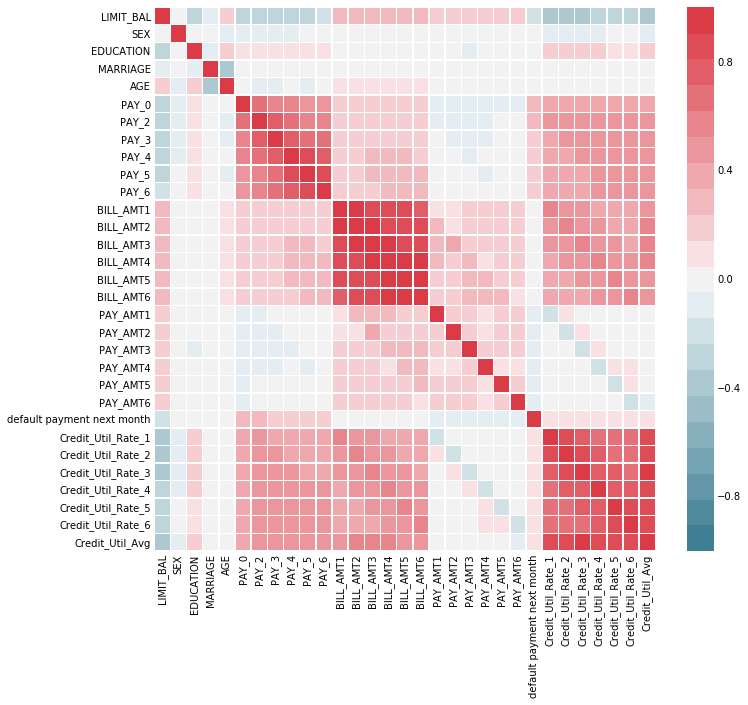

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(credit_card_default.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21),
           linewidths=.5, ax=ax);
#heatmap to identify correlation. Looks like Repayment Status and Credit Utilization Rate have a high correlation with default payment next month 

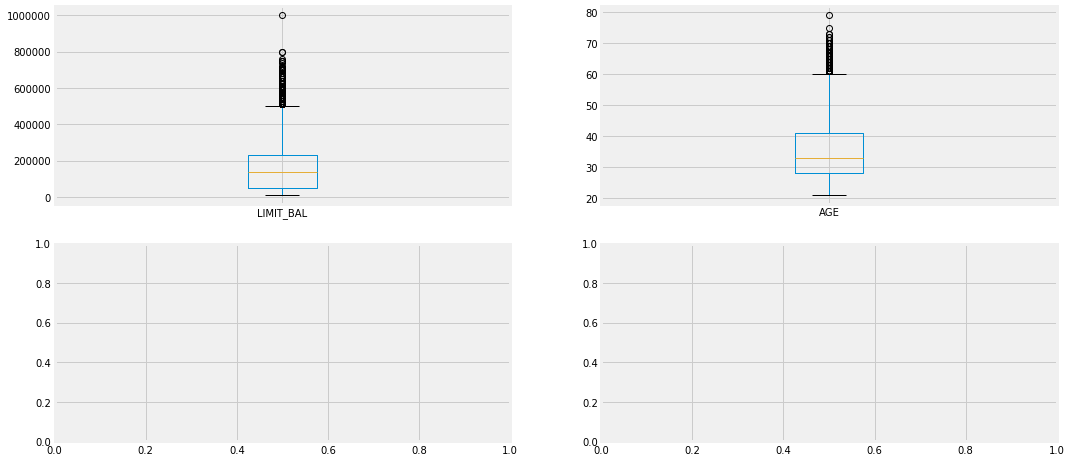

In [15]:
fig, axes = plt.subplots(2,2, figsize=(16,8))
credit_card_default.loc[:,['LIMIT_BAL']].plot(kind='box', ax=axes[0,0])
credit_card_default.loc[:,['AGE']].plot(kind='box', ax=axes[0,1]);
#Identify outliers via boxplot for 'AGE' and 'LIMIT BALANCE'

female    13729
male       8771
Name: SEX, dtype: int64


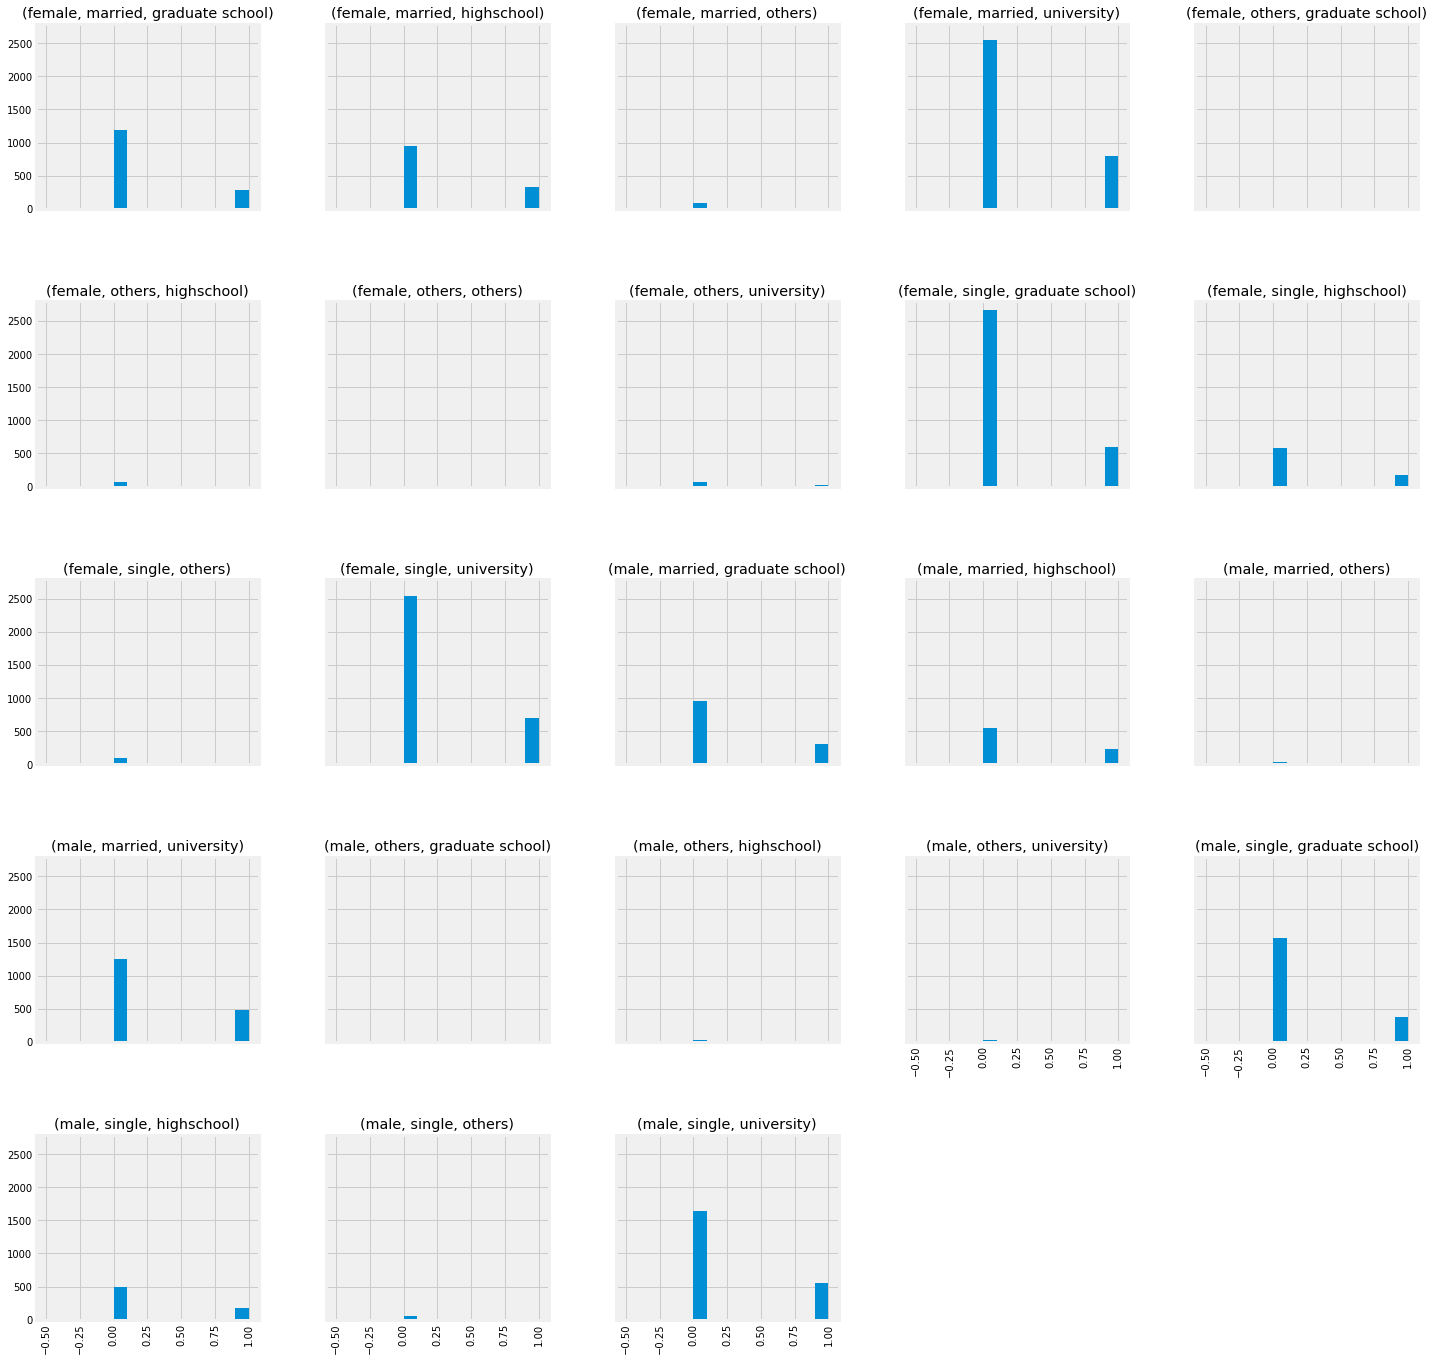

In [16]:
credit_card_default['SEX'] = credit_card_default['SEX'].replace({1:'male', 2:'female'})
credit_card_default['MARRIAGE'] = credit_card_default['MARRIAGE'].replace({1:'married', 2:'single', 3:'others'})
credit_card_default['EDUCATION'] = credit_card_default['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'highschool', 4:'others'})
print(credit_card_default.loc[:,'SEX'].value_counts())
credit_card_default.hist(column='default payment next month', by=['SEX','MARRIAGE', 'EDUCATION'], figsize=(24, 24), sharex=True, sharey=True);
#Identify a combination of demographics (SEX, MARRIAGE, EDUCATION) to identfiy most defaults

#### Education Analysis

university         10634
graduate school     7982
highschool          3581
others               303
Name: EDUCATION, dtype: int64
Percentage of graduate defaulted: 19.731896767727385
Percentage of high school defaulted: 25.886623848087126
Percentage of others defaulted: 6.6006600660066
Percentage of university defaulted: 24.13014858002633
                                            default payment next month
EDUCATION       default payment next month                            
graduate school 0                                                 6407
                1                                                 1575
highschool      0                                                 2654
                1                                                  927
others          0                                                  283
                1                                                   20
university      0                                                 8068
                1   

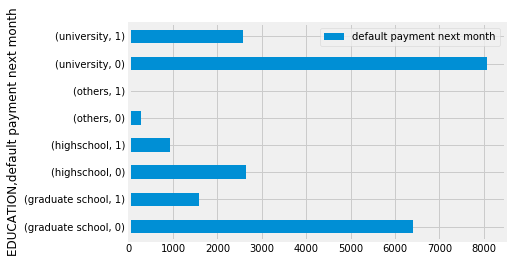

In [17]:
print(credit_card_default.loc[:,'EDUCATION'].value_counts())
print('Percentage of graduate defaulted:', 1575/(7982)*100)
print('Percentage of high school defaulted:', 927/(3581)*100)
print('Percentage of others defaulted:', 20/(303)*100)
print('Percentage of university defaulted:', 2566/(10634)*100)
cd_ed = credit_card_default.groupby(['EDUCATION', 'default payment next month']).agg({'default payment next month':'count'})
print(cd_ed)
cd_ed.plot(kind='barh')
#Identify percentage of every education status that defaulted
#According to the graph, individuals with 'university' education defaulted the most but as a perentage high school defaults is higher than university 

#### Sex Analysis

female    13729
male       8771
Name: SEX, dtype: int64
Percentage of female defaulted: 21.334401631582782
Percentage of male defaulted: 24.61520921217649
                                   default payment next month
SEX    default payment next month                            
female 0                                                10800
       1                                                 2929
male   0                                                 6612
       1                                                 2159


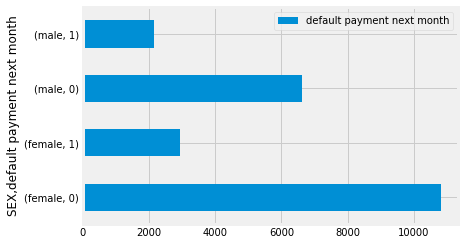

In [18]:
print(credit_card_default.loc[:,'SEX'].value_counts())
print('Percentage of female defaulted:', 2929/(13729)*100)
print('Percentage of male defaulted:', 2159/(8771)*100)
cd_sex = credit_card_default.groupby(['SEX', 'default payment next month']).agg({'default payment next month': 'count'})
print(cd_sex)
cd_sex.plot(kind='barh')
#Percentage of female and male defaults are relatively close

#### Marriage Analysis

single     12219
married     9990
others       291
Name: MARRIAGE, dtype: int64
Perecentage of married defaulted: 24.254254254254253
Perecentage of single defaulted: 21.261969064571566
Percentage of others defaulted: 23.02405498281787
                                     default payment next month
MARRIAGE default payment next month                            
married  0                                                 7567
         1                                                 2423
others   0                                                  224
         1                                                   67
single   0                                                 9621
         1                                                 2598


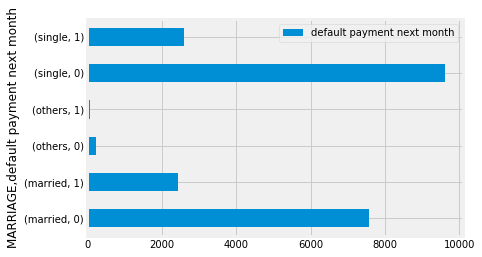

In [19]:
print(credit_card_default.loc[:,'MARRIAGE'].value_counts())
print('Perecentage of married defaulted:', (2423/9990)*100)
print('Perecentage of single defaulted:', (2598/12219)*100)
print('Percentage of others defaulted:', (67/291)*100)
cd_marriage = credit_card_default.groupby(['MARRIAGE', 'default payment next month']).agg({'default payment next month': 'count'})
print(cd_marriage)
cd_marriage.plot(kind='barh')
#Percentage of marriage status defaults are relatively the same

#### Demographics Analysis

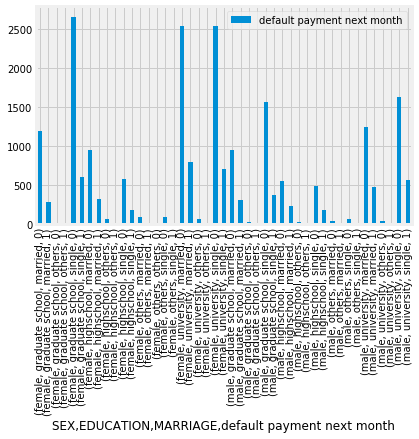

In [20]:
cd = credit_card_default.groupby(['SEX', 'EDUCATION', 'MARRIAGE','default payment next month']).agg({'default payment next month':'count'})
cd.plot(kind='bar');
#Graph histogram to see which demographic combinations have the most count

In [21]:
cd.columns = ['default']
cd = cd.reset_index()
cd.sort_values(by=['default payment next month', 'default'], ascending = False)
#majority of the population is female,graduate, single (2661). The highest combination defaulted is female, university, married (791). However not the best representation because majority of the data population is females, unveristy, and single 

,SEX,EDUCATION,MARRIAGE,default payment next month,default
18,female,university,married,1,791
22,female,university,single,1,703
5,female,graduate school,single,1,598
44,male,university,single,1,559
40,male,university,married,1,480
28,male,graduate school,single,1,376
7,female,highschool,married,1,326
24,male,graduate school,married,1,304
1,female,graduate school,married,1,286
30,male,highschool,married,1,227


#### Credit Utilization Rate Analysis

0.7779555555555555
0.7722074074074075
0    0.777956
1    0.222044
Name: default payment next month, dtype: float64


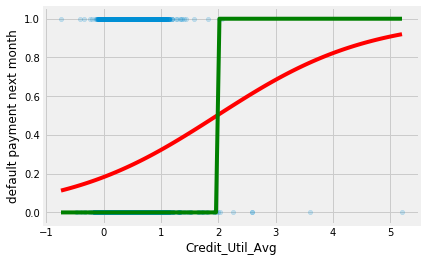

In [22]:
feature_cols = ['Credit_Util_Avg']
target_col = 'default payment next month'

X = credit_card_default.loc[:, feature_cols]
y= credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
print(y_test.value_counts(normalize=True))
y_pred_prob = lr.predict_proba(X_test)

x_grid = np.linspace(start=credit_card_default.loc[:, 'Credit_Util_Avg'].min(), 
                     stop=credit_card_default.loc[:, 'Credit_Util_Avg'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = credit_card_default.plot(kind='scatter', x='Credit_Util_Avg', y='default payment next month', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

#Performing train/test/split on only Credit Utilization Avg 
# Predicting pretty well but I think it could be better if added Payment Status

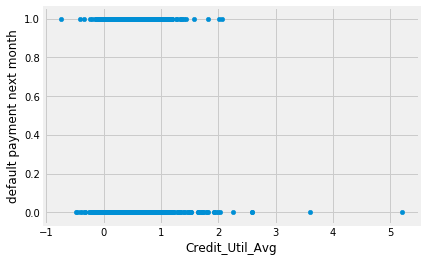

In [23]:
credit_card_default.plot(kind='scatter', x='Credit_Util_Avg', y='default payment next month')
#Want to dig a little deeper to see outlier

In [24]:
credit_card_default.loc[credit_card_default.loc[:, 'Credit_Util_Avg'] > 5,:]
#This person is an outlier with a high Credit Utilization Rate because her payment status per month are all zeros

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg
ID,,,,,,,,,,,,,,,,,,,,,
3797,20000,female,university,single,32,0,0,0,0,0,...,2900,2000,0,6.2343,6.198,5.2354,4.98685,4.78125,3.78555,5.203558


In [25]:
ccd = credit_card_default.loc[credit_card_default.loc[:, 'default payment next month'] ==1,:]
ccd.loc[ccd.loc[:, 'Credit_Util_Avg'] > 2,:]
#These people defaulted and have the highest credit utilization rate. 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg
ID,,,,,,,,,,,,,,,,,,,,,
2899,20000,male,graduate school,single,37,0,0,0,0,0,...,649,623,1,3.214100,3.234000,3.445750,0.817100,0.833850,0.853250,2.066342
20440,80000,male,university,single,24,1,2,2,2,0,...,5800,6500,1,2.231762,2.028612,2.208712,2.139263,1.800075,1.690075,2.016417


$\blacksquare$

## Model types, Hyperparameter settings, Combinations of features

In [26]:
credit_card_default['SEX'] = credit_card_default['SEX'].replace({'male':1,'female':2})
credit_card_default['MARRIAGE'] = credit_card_default['MARRIAGE'].replace({'married':1,'single':2, 'others':3})
credit_card_default['EDUCATION'] = credit_card_default['EDUCATION'].replace({'graduate school':1,'university':2, 'highschool':3,'others':4})
#Changing it back to all numerical data types

### Logistic Regression

#### I. Logistic Regression Fit

In [27]:
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
#Perform a Train/Test/Split  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
#Score the accuracy score for test and train data. Does not look overfitting or underfitting.

0.7744
0.7722666666666667


In [29]:
y.value_counts(normalize=True)
#Not much better than saying yes everytime, definitely a bias problem

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

#### II. Logistic Regression Metric

In [30]:
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)
#Get the confusion matrix. There are no false positives or true negatives

array([[4344,    0],
       [1281,    0]])

In [31]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob
#Identifty probability for test data set 

array([0.04400353, 0.21092419, 0.08453606, ..., 0.08223236, 0.34479853,
       0.28739112])

In [32]:
y_pred_low_thresh = y_pred_prob > .3
metrics.confusion_matrix(y_test, y_pred_low_thresh)
#Setting threshold to .3 to get some false positives and true negatives

array([[2655, 1689],
       [ 589,  692]])

In [33]:
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)
#identifying the best score and threshold for F2
#The best score = 59.70% with a threshold of 5.24%

0.5970432145564821 0.0524390327046559


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)
#Confusion matrix for F2 beta at threshold of 5.24%

array([[ 176, 4168],
       [  21, 1260]])

In [35]:
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f2 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))
#Calculating metrics for Fbeta 2
#Accuracy became very low but with a high recall 

accuracy score: 0.2552888888888889
precision score: 0.23212969786293294
recall score: 0.9836065573770492
f2 score: 0.5970432145564821


#### I. Decision Tree Fit

##### Finding best max_depth for decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
max_depth_range = range(1,21)
from sklearn.model_selection import cross_val_score, KFold

scores = []

kf = KFold(n_splits=10, shuffle=True)

for depth in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores.append(cross_val_score(dtc, X, y, cv=kf).mean())
    
scores

[0.8147111111111112,
 0.8160888888888888,
 0.8154222222222222,
 0.8152444444444444,
 0.8164888888888889,
 0.8143111111111111,
 0.8142222222222222,
 0.8132444444444443,
 0.8100888888888889,
 0.8073777777777777,
 0.8024888888888888,
 0.8009777777777778,
 0.7976888888888889,
 0.7914666666666667,
 0.7866222222222222,
 0.7819999999999999,
 0.7770222222222223,
 0.768,
 0.7657333333333334,
 0.7556]

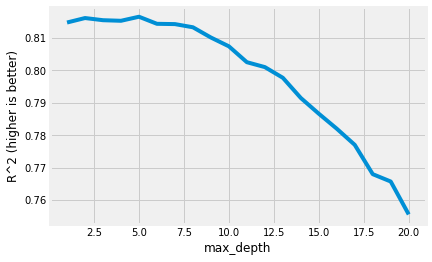

In [37]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('R^2 (higher is better)');

In [38]:
sorted(zip(scores, max_depth_range))[::-1]
#Best Max_Depth is 5

[(0.8164888888888889, 5),
 (0.8160888888888888, 2),
 (0.8154222222222222, 3),
 (0.8152444444444444, 4),
 (0.8147111111111112, 1),
 (0.8143111111111111, 6),
 (0.8142222222222222, 7),
 (0.8132444444444443, 8),
 (0.8100888888888889, 9),
 (0.8073777777777777, 10),
 (0.8024888888888888, 11),
 (0.8009777777777778, 12),
 (0.7976888888888889, 13),
 (0.7914666666666667, 14),
 (0.7866222222222222, 15),
 (0.7819999999999999, 16),
 (0.7770222222222223, 17),
 (0.768, 18),
 (0.7657333333333334, 19),
 (0.7556, 20)]

In [39]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

##### Identifying feature importances for decision tree

In [40]:
sorted(zip(dtc.feature_importances_, feature_cols))[::-1]
#Identify feature importance with Pay_0 (Payment Status) as the most important feature

[(0.7245137867126886, 'PAY_0'),
 (0.14186643646865046, 'PAY_2'),
 (0.029677950357625615, 'PAY_5'),
 (0.02768126670518073, 'PAY_4'),
 (0.02619720154087717, 'LIMIT_BAL'),
 (0.018055956781666393, 'Credit_Util_Avg'),
 (0.017158215006800506, 'PAY_3'),
 (0.00863574535347611, 'AGE'),
 (0.002873030270183063, 'EDUCATION'),
 (0.0019467441233936241, 'SEX'),
 (0.0013936666794574465, 'PAY_6'),
 (0.0, 'MARRIAGE')]

##### Fitting decision tree with max_depth of 5

In [41]:
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
#Perform Decision Tree and Fit it

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
#Scores are doing better than guessing everytime

0.8209777777777778
0.8161777777777778


#### II. Decision Tree Metric

In [43]:
y_pred = dtc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4185,  195],
       [ 839,  406]])

In [44]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.3523622 , 0.17962289, 0.11256661, ..., 0.11256661, 0.11256661,
       0.11256661])

In [45]:
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)
#identifying the best score and threshold for F2
#The best score = 60.94% with a threshold of 11.13%

0.602672664726118 0.11256660746003552


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)
#Calculate the confusion matrix for the best threshold for f2

array([[2713, 1667],
       [ 334,  911]])

In [47]:
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f2 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))
#Calculate the test-set accuracy, precision, recall and F2 score for model 

accuracy score: 0.6442666666666667
precision score: 0.35337470907680374
recall score: 0.7317269076305221
f2 score: 0.602672664726118


#### I. Random Classifier Fit

In [48]:
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, oob_score=True, max_depth=5) 

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [49]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8214518518518519
0.8119111111111111


#### II. Random Classifier Metric

In [50]:
y_pred = rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4098,  223],
       [ 835,  469]])

In [51]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.1578339 , 0.6351623 , 0.11737713, ..., 0.55277516, 0.15037882,
       0.1465879 ])

In [52]:
#identifying the best score and threshold for F2
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)

0.6331006979062811 0.13173295936086377


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)
#Calculate the confusion matrix for the best threshold for f2

array([[1653, 2668],
       [ 161, 1143]])

In [54]:
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f1 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))
#Calculate the test-set accuracy, precision, recall and F2 score for model 

accuracy score: 0.49706666666666666
precision score: 0.2999212805038048
recall score: 0.8765337423312883
f1 score: 0.6331006979062811


##### Identifying feature importances

In [55]:
rfc = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=1)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [56]:
sorted(zip(rfc.feature_importances_, feature_cols))[::-1]
#Identified Credit_Util_Avg as the most important feature 

[(0.2540201027666378, 'Credit_Util_Avg'),
 (0.17589868668234226, 'AGE'),
 (0.14935179302042376, 'LIMIT_BAL'),
 (0.11140050058457156, 'PAY_0'),
 (0.0577655303064744, 'PAY_2'),
 (0.045968051676010833, 'EDUCATION'),
 (0.041649479590784445, 'PAY_3'),
 (0.038424822955210824, 'PAY_4'),
 (0.036198838763234736, 'PAY_5'),
 (0.03523416450507336, 'PAY_6'),
 (0.02785829517003498, 'MARRIAGE'),
 (0.026229733979201055, 'SEX')]

In [57]:
rfc.oob_score_ 
#Out of Bag Score is 80.5% which is pretty good

0.8049777777777778